# Pymaceuticals Inc.
---

### Analysis

- After analyzing the data Capomulin and Ramicane had the highest number of mice tested.  The numbers are extremely close for both drugs, but Ramicane seems to have slightly better results in all categories.
- The number that stood out was Ramicane (23.49) was about 1.5 less in Tumor Volume Variance than Capomulin (24.95).

 

In [368]:
# Dependencies and Setup
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(study_results,mouse_metadata, how="left", on=["Mouse ID"])

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [369]:
# Checking the number of mice.
mice_count = len(mouse_data_complete['Mouse ID'].unique())
mice_count

249

In [370]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = mouse_data_complete
dup_mice = dup_mice[dup_mice.duplicated(subset=['Mouse ID', 'Timepoint'])]
dup_mice['Mouse ID'].unique()

array(['g989'], dtype=object)

In [371]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_all = mouse_data_complete
dup_mice_all = dup_mice_all.loc[dup_mice_all['Mouse ID'] == 'g989']
dup_mice_all

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [372]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = mouse_data_complete
clean_mice = clean_mice.drop(clean_mice.index[clean_mice['Mouse ID'] == 'g989'])
clean_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [373]:
# Checking the number of mice in the clean DataFrame.
mice_cnt = len(clean_mice['Mouse ID'].unique())
mice_cnt

248

## Summary Statistics

In [374]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
sum_data = mouse_data_complete
sum_df = pd.DataFrame({'Mean Tumor Volume':sum_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'],
                      'Mediam Tumor Volume':sum_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'],
                      'Tumor Volume Variance':sum_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'],
                      'Tumor Volume Std. Dev.':sum_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'],
                      'Tumor Volume Std. Err.':sum_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']})
sum_df

,Mean Tumor Volume,Mediam Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [375]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
one_line_df = mouse_data_complete
one_line_df = one_line_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([np.mean,np.median,np.var,np.std,st.sem])
one_line_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

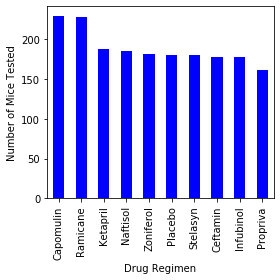

In [376]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_tested = mouse_data_complete
mice_tested = pd.DataFrame(mice_tested.groupby(["Drug Regimen"]).count()["Mouse ID"])
mice_tested = mice_tested.sort_values('Mouse ID',ascending=False)
mice_tested.plot.bar(figsize=(4,4), color='b',legend=False)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.tight_layout()
plt.show()

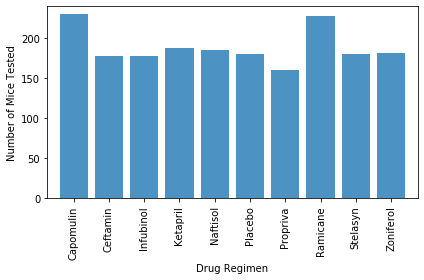

In [377]:
pyp_mice_tested = mouse_data_complete
pyp_mice_tested = pd.DataFrame(pyp_mice_tested.groupby(["Drug Regimen"]).count()["Mouse ID"])
pyp_mice = list(mouse_data_complete.groupby(["Drug Regimen"]).count()["Mouse ID"])

x_axis = np.arange(len(pyp_mice_tested))
plt.bar(x_axis, pyp_mice, alpha=0.8, align="center")

pyp_mice_tested = pyp_mice_tested.reset_index()

drug_r = list(pyp_mice_tested['Drug Regimen'])
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, drug_r,rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(pyp_mice)+10)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.tight_layout()
plt.show()


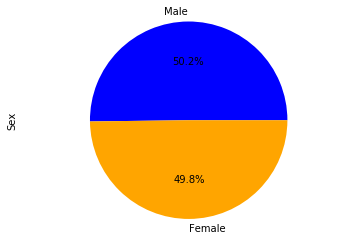

In [378]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female = mouse_data_complete
male_female = male_female.groupby(['Mouse ID','Sex'])
male_female = pd.DataFrame(male_female.size())
male_female = pd.DataFrame(male_female.groupby(['Sex']).count())
male_female.columns = ['Total']
male_female['pct'] = ((male_female["Total"]/male_female["Total"].sum()))
male_female = male_female.sort_values('Total',ascending=False)
colors = ['blue','orange']
plot = male_female.plot.pie(y='Total',colors=colors,autopct="%1.1f%%",legend=False)
plt.ylabel('Sex')
plt.axis('equal')
plt.show()


(-1.1085661126710573,
 1.1067420171289606,
 -1.1138795996513482,
 1.1068615264937038)

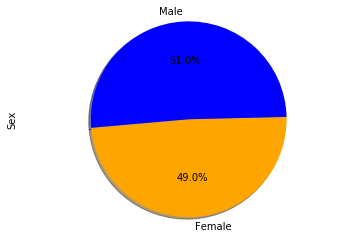

In [379]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female','Male']
dist = [49.0,51.0]
colors = ['orange','blue']
explode = (0, 0)
plt.pie(dist, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=185)
plt.ylabel('Sex')
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [380]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
cap_df = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Capomulin",:]
ram_df = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Ramicane", :]
inf_df = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Infubinol", :]
cef_df = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
cap_lst_gr_tp = cap_df.groupby('Mouse ID').max()['Timepoint']
cap_lst_gr_tp_df = pd.DataFrame(cap_lst_gr_tp)
ram_lst_gr_tp = ram_df.groupby('Mouse ID').max()['Timepoint']
ram_lst_gr_tp_df = pd.DataFrame(ram_lst_gr_tp)
inf_lst_gr_tp = inf_df.groupby('Mouse ID').max()['Timepoint']
inf_lst_gr_tp_df = pd.DataFrame(inf_lst_gr_tp)
cef_lst_gr_tp = cef_df.groupby('Mouse ID').max()['Timepoint']
cef_lst_gr_tp_df = pd.DataFrame(cef_lst_gr_tp)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
cap_merge = pd.merge(cap_lst_gr_tp_df, mouse_data_complete, on=('Mouse ID','Timepoint'),how='left')
inf_merge = pd.merge(inf_lst_gr_tp_df, mouse_data_complete, on=('Mouse ID','Timepoint'),how='left')
cef_merge = pd.merge(cef_lst_gr_tp_df, mouse_data_complete, on=('Mouse ID','Timepoint'),how='left')
cap_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [381]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
cap_tumors = cap_merge['Tumor Volume (mm3)']
cap_quart = cap_tumors.quantile([.25,.5,.75])
c_low = cap_quart[0.25]
c_upp = cap_quart[.75]
c_irq = c_upp - c_low
c_low_b = c_low - (1.5*c_irq)
c_upp_b = c_upp + (1.5*c_irq)
print(f"Capomulin's potential outliers:{c_low_b} {c_upp_b}")
ram_tumors = ram_merge['Tumor Volume (mm3)']
ram_quart = ram_tumors.quantile([.25,.5,.75])
r_low = ram_quart[0.25]
r_upp = ram_quart[.75]
r_irq = r_upp - r_low
r_low_b = r_low - (1.5*r_irq)
r_upp_b = r_upp + (1.5*r_irq)
print(f"Ramicane's potential outliers:{r_low_b} {r_upp_b}")
inf_tumors = inf_merge['Tumor Volume (mm3)']
inf_quart = inf_tumors.quantile([.25,.5,.75])
i_low = inf_quart[0.25]
i_upp = inf_quart[.75]
i_irq = i_upp - i_low
i_low_b = i_low - (1.5*i_irq)
i_upp_b = i_upp + (1.5*i_irq)
print(f"Infubinol's potential outliers:{i_low_b} {i_upp_b}")
cef_tumors = cef_merge['Tumor Volume (mm3)']
cef_quart = cef_tumors.quantile([.25,.5,.75])
cf_low = cef_quart[0.25]
cf_upp = cef_quart[.75]
cf_irq = cf_upp - cf_low
cf_low_b = cf_low - (1.5*cf_irq)
cf_upp_b = cf_upp + (1.5*cf_irq)
print(f"Ceftamin's potential outliers:{cf_low_b} {cf_upp_b}")

Capomulin's potential outliers:20.70456164999999 51.83201549
Ramicane's potential outliers:17.912664470000003 54.30681135
Infubinol's potential outliers:36.83290494999999 82.74144559000001
Ceftamin's potential outliers:25.355449580000002 87.66645829999999


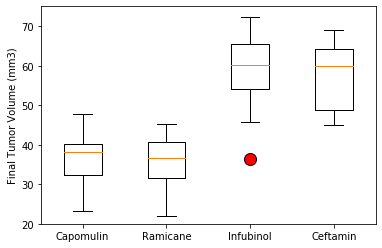

In [382]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box_plot = [cap_tumors, ram_tumors, inf_tumors, cef_tumors]
drug_reg= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(box_plot, labels=drug_reg,
            flierprops={'marker': 'o', 'markersize': 12, 'markerfacecolor': 'red'})

plt.ylim(20, 75)

plt.show()

## Line and Scatter Plots

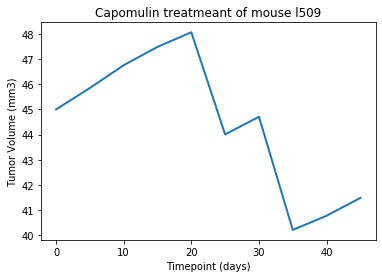

In [383]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_l509 = cap_df.loc[cap_df['Mouse ID'] == 'l509']
mouse_l509

tum_vol = mouse_l509["Tumor Volume (mm3)"]
x_axis = mouse_l509["Timepoint"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tum_vol,linewidth=2, markersize=12)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

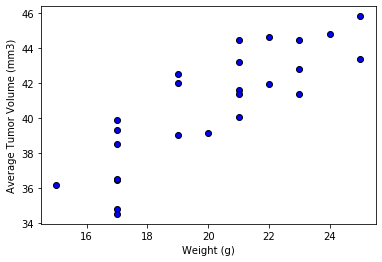

In [384]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_mouse_ave = cap_df.groupby(['Mouse ID']).mean()
cap_mouse_ave
ave_tum_vol = cap_mouse_ave['Tumor Volume (mm3)']
cap_weight = cap_mouse_ave['Weight (g)']
plt.scatter(cap_weight, ave_tum_vol, marker="o", facecolors="blue", edgecolors="black")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


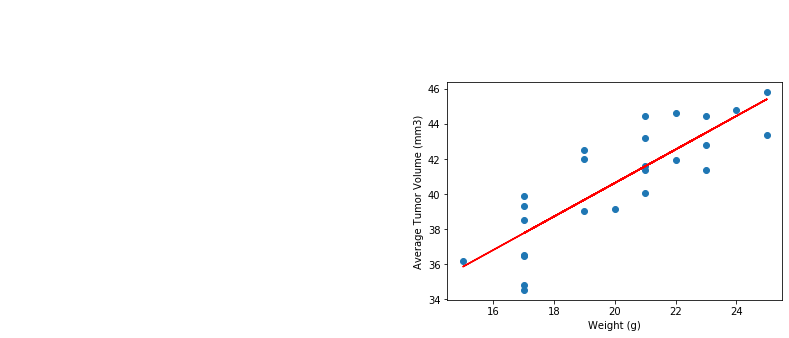

In [385]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = cap_mouse_ave['Weight (g)']
y_values = cap_mouse_ave['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f'The correlation between mouse weight and the average tumor volume is {str(round(rvalue,2))}')
plt.show()
